In [ ]:
import os
import cv2
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#https://drive.google.com/file/d/1KBadEsrjr0OELZdon09x5bpUGRew9OIT/view?usp=sharing
#classification
#importing dataset
import gdown
import zipfile
import os

# Google Drive file ID and URL to download the file
file_id = '1KBadEsrjr0OELZdon09x5bpUGRew9OIT'
download_url = f'https://drive.google.com/uc?id={file_id}'
output_path = '/content/forestfire.zip'

# Download the file
gdown.download(download_url, output_path, quiet=False)

# Path to unzip the file
extract_path = '/content'
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(output_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping completed.")

Downloading...
From (original): https://drive.google.com/uc?id=1KBadEsrjr0OELZdon09x5bpUGRew9OIT
From (redirected): https://drive.google.com/uc?id=1KBadEsrjr0OELZdon09x5bpUGRew9OIT&confirm=t&uuid=e3fa990f-b4cd-40f9-b5e3-d071a88a4fba
To: /content/forestfire.zip
100%|██████████| 383M/383M [00:14<00:00, 27.3MB/s]


Unzipping completed.


**<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Read Data </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [ ]:
# #Files
# path='/content/content/classification_dataset/ForestFireDataset/train'
# pd.DataFrame(os.listdir(path),columns=['Files'])

Files
0    fire
1  nofire

In [ ]:

# Paths to your datasets
train_data_dir = '/content/content/classification_dataset/ForestFireDataset/train'
valid_data_dir = '/content/content/classification_dataset/ForestFireDataset/valid'

# Parameters
batch_size = 16
target_size = (224, 224)

# Load the training dataset
train = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    image_size=target_size,
    batch_size=batch_size,
    label_mode='int'  # 'int', 'categorical', or 'binary'
)

# Load the validation dataset
validation = tf.keras.preprocessing.image_dataset_from_directory(
    valid_data_dir,
    image_size=target_size,
    batch_size=batch_size,
    label_mode='int'  # 'int', 'categorical', or 'binary'
)


Found 2834 files belonging to 2 classes.
Found 525 files belonging to 2 classes.


In [ ]:
# train_data_dir =path
# valid_data_dir ='/content/content/classification_dataset/ForestFireDataset/valid'
# batch_size = 32
# target_size = (224, 224)
# validation_split = 0.0
# train= tf.keras.preprocessing.image_dataset_from_directory(
#     train_data_dir,
#     validation_split=validation_split,
#     subset="training",
#     seed=200,
#     image_size=target_size,
#     batch_size=batch_size,
# )
# validation= tf.keras.preprocessing.image_dataset_from_directory(
#     train_data_dir,
#     # validation_split=validation_split,
#     subset="validation",
#     seed=44,
#     image_size=target_size,
#     batch_size=batch_size,
# )

ValueError: If `subset` is set, `validation_split` must be set, and inversely.

**<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Visualization of Dataset </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [ ]:
# class_names = train.class_names
# class_names

['fire', 'nofire']

In [ ]:
# plt.figure(figsize=(15, 25))
# for images, labels in train.take(1):
#     for i in range(32):
#         ax = plt.subplot(8, 4, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(class_names[labels[i]])
#         plt.axis("off")

<a id="4"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Modeling </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
model=keras.models.Sequential()
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))
model.build()
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 14739777 (56.23 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


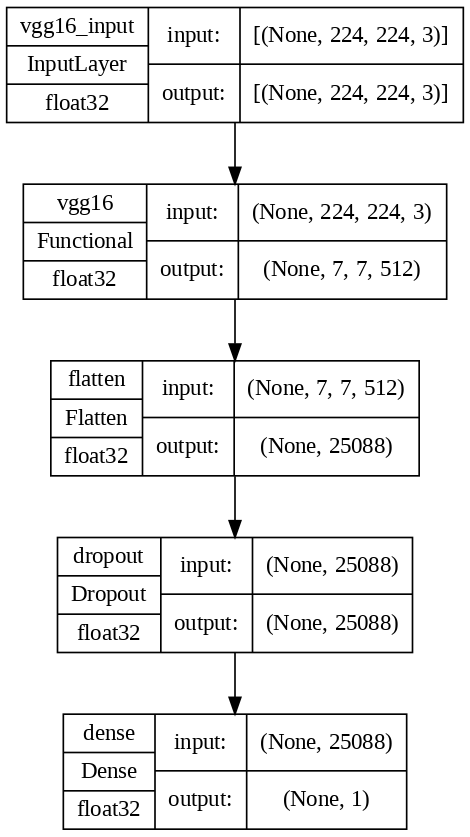

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [ ]:
!mkdir vgg16_result

In [ ]:
from tensorflow.keras import metrics
checkpoint_cb =ModelCheckpoint("/content/vgg16_result/my_keras_model.keras", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=3, restore_best_weights=True)
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics=['accuracy',
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.AUC(name='pr_auc', curve='PR'),])
hist=model.fit(train,epochs=200,validation_data=validation,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 25s 118ms/step - accuracy: 0.9985 - auc: 0.9989 - loss: 0.0262 - pr_auc: 0.9977 - precision: 0.9965 - recall: 0.9984 - val_accuracy: 0.9943 - val_auc: 0.9979 - val_loss: 0.1944 - val_pr_auc: 0.9608 - val_precision: 0.9608 - val_recall: 0.9800
Epoch 2/20


KeyboardInterrupt: 

In [ ]:
# score, acc = model.evaluate(validation)
# print('Test Loss =', score)
# print('Test Accuracy =', acc)

19/19 [==============================] - 7s 230ms/step - loss: 0.1220 - accuracy: 0.9864
Test Loss = 0.12201650440692902
Test Accuracy = 0.9864176511764526


In [ ]:
hist_=pd.DataFrame(hist.history)
hist_.index.name = 'epochs'
hist_
hist_.to_csv('vgg16_result/training_history_vgg16.csv')


In [ ]:
!zip -r vgg16_result.zip /content/vgg16_result
from google.colab import files
files.download("vgg16_result.zip")

  adding: content/vgg16_result/ (stored 0%)
  adding: content/vgg16_result/training_history_vgg16.csv (deflated 49%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

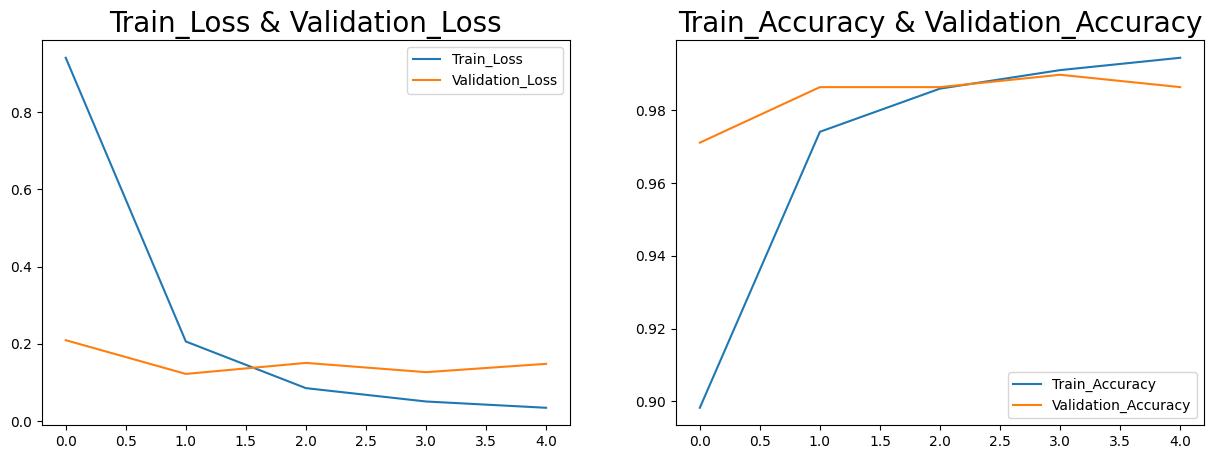

In [ ]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# plt.plot(hist_['loss'],label='Train_Loss')
# plt.plot(hist_['val_loss'],label='Validation_Loss')
# plt.title('Train_Loss & Validation_Loss',fontsize=20)
# plt.legend()
# plt.subplot(1,2,2)
# plt.plot(hist_['accuracy'],label='Train_Accuracy')
# plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
# plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
# plt.legend()

In [ ]:
# X_val,y_val=[],[]
# for images, labels in validation:
#     y_val.extend(labels.numpy())
#     X_val.extend(images.numpy())
# predictions=model.predict(np.array(X_val))
# y_pred=np.where(predictions>=.5,1,0)
# df=pd.DataFrame()
# df['Actual'],df['Prediction']=y_val,y_pred
# df

19/19 [==============================] - 3s 133ms/step


Actual  Prediction
0         1           1
1         1           1
2         1           1
3         1           0
4         0           0
..      ...         ...
584       0           0
585       0           0
586       0           0
587       0           0
588       0           0

[589 rows x 2 columns]

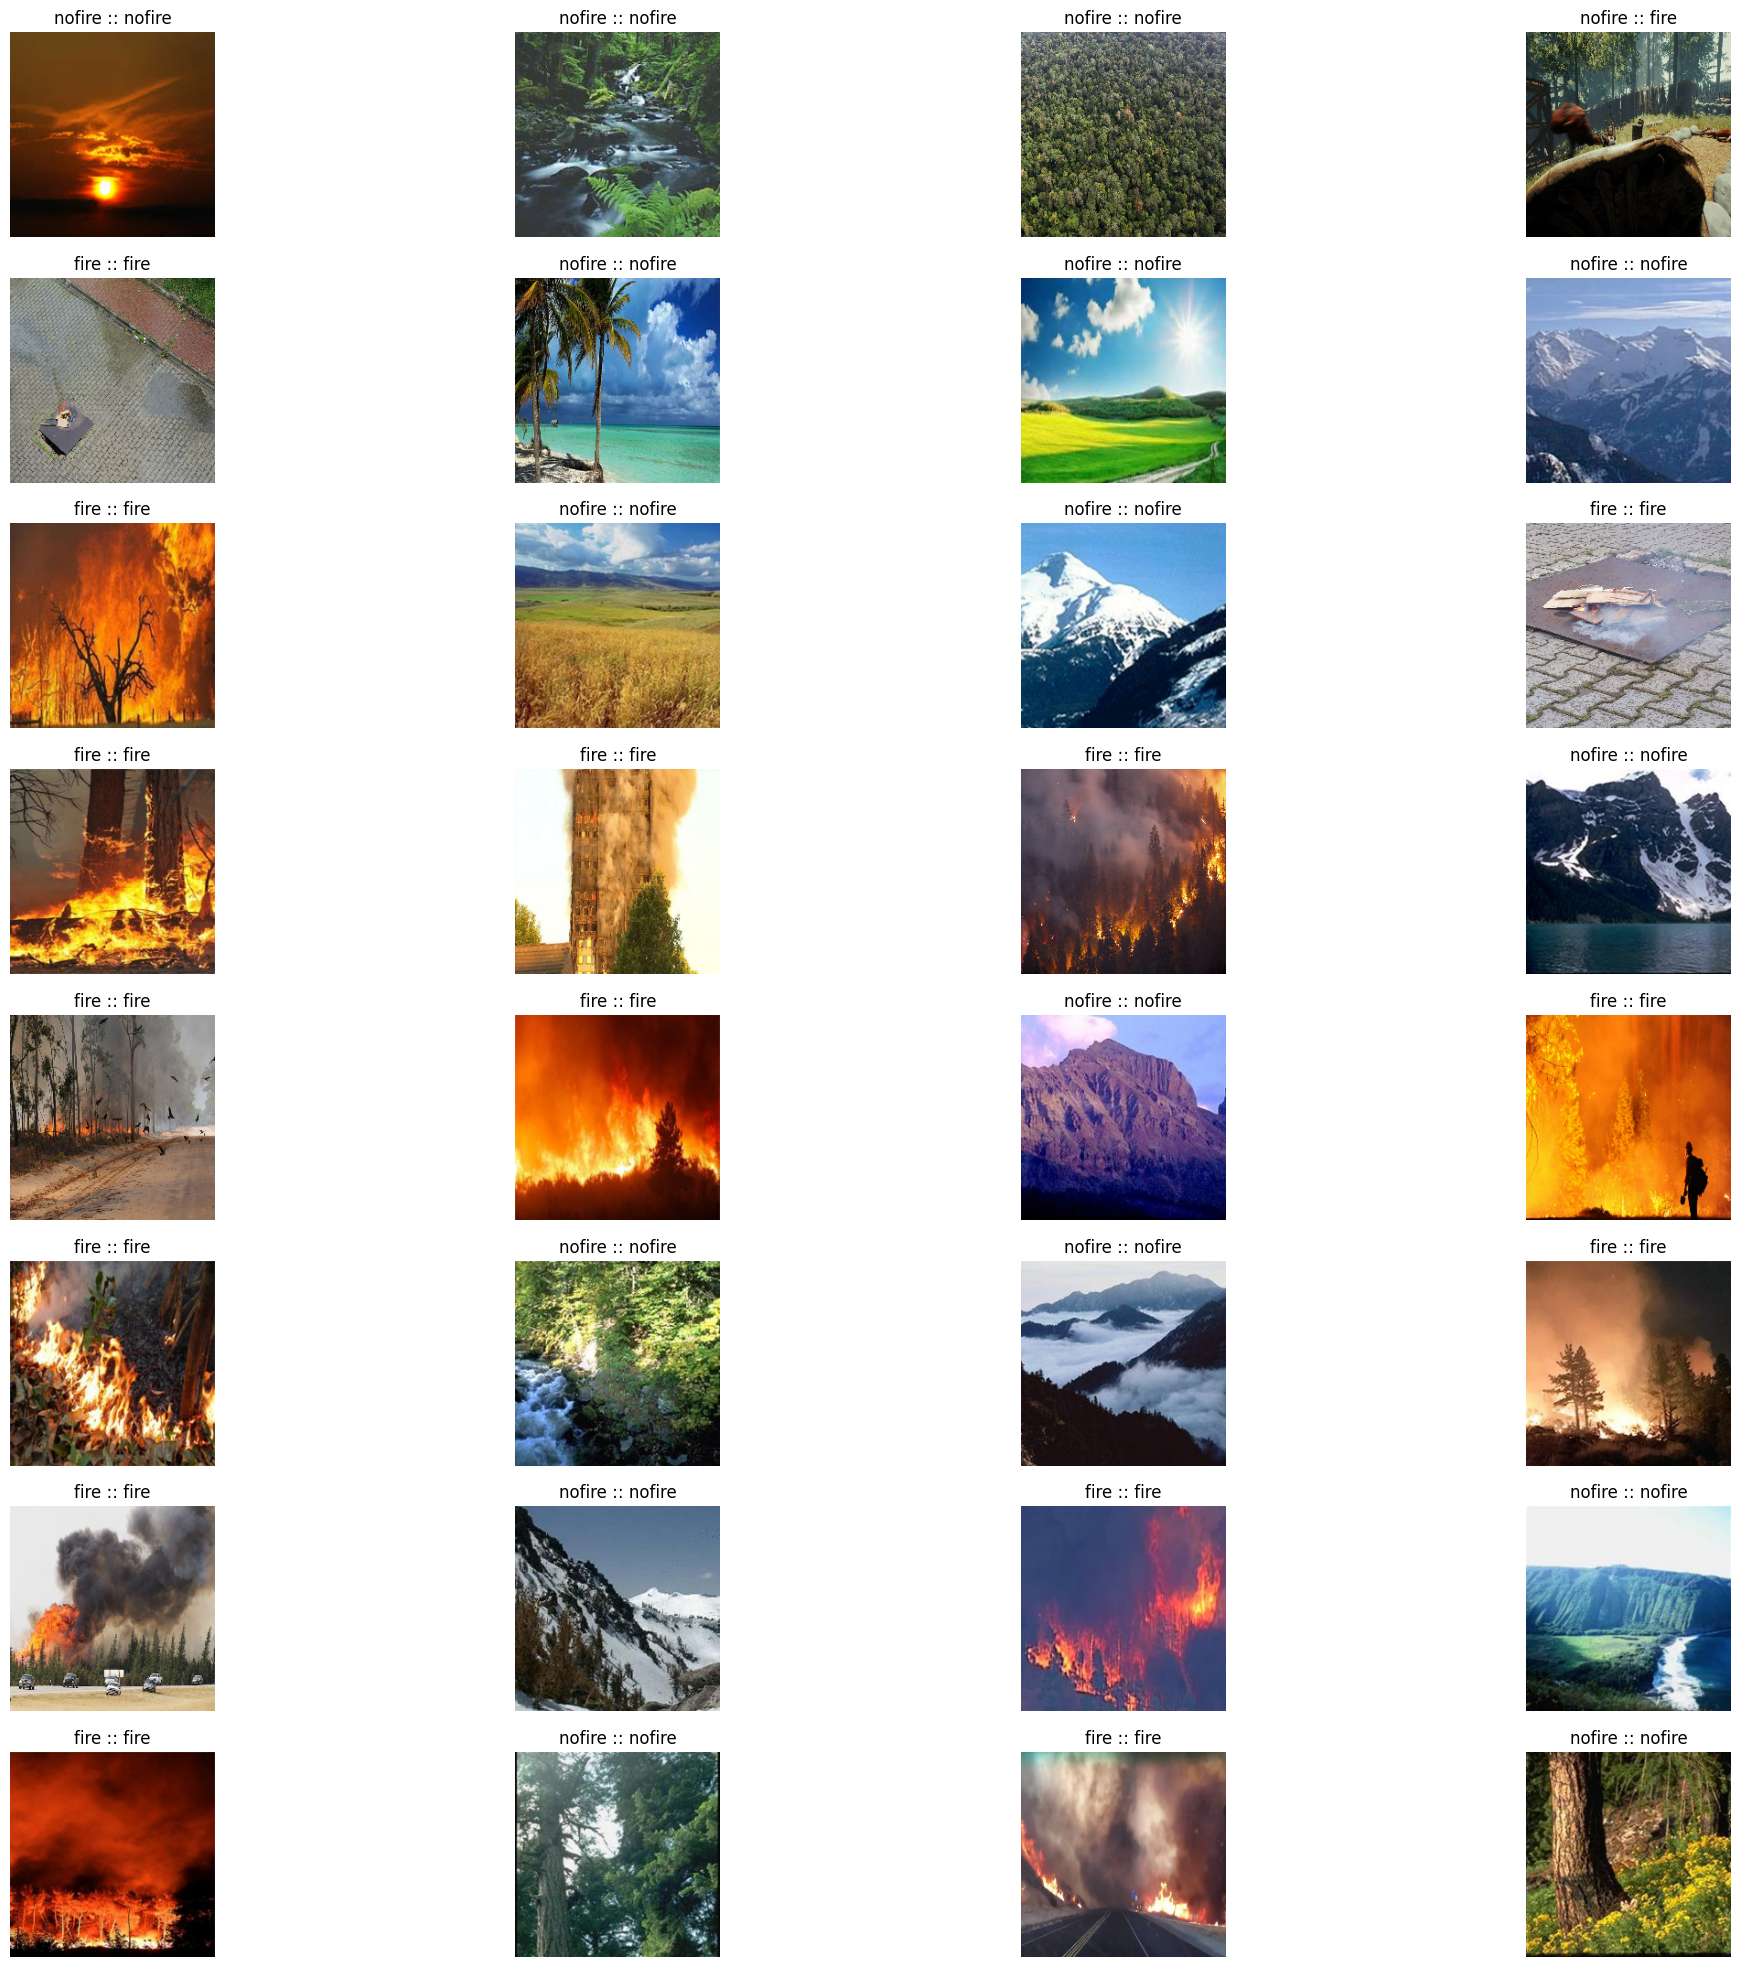

In [ ]:
# plt.figure(figsize=(25,25))
# for i in range(32):
#     ax = plt.subplot(8, 4, i + 1)
#     plt.imshow(X_val[i].astype("uint8"))
#     plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i][0]]}')
#     plt.axis("off")

<a id="5"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Evaluate The Model  </p>
<a class="btn" href="#home">Tabel of Contents</a>

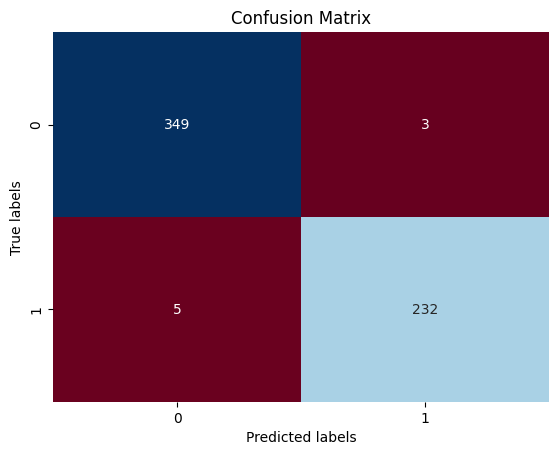

array([[349,   3],
       [  5, 232]])

In [ ]:
# ax= plt.subplot()
# CM = confusion_matrix(y_val,y_pred)
# sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels')
# ax.set_title('Confusion Matrix')
# plt.show()
# CM

In [ ]:
# ClassificationReport = classification_report(y_val,y_pred)
# print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.99      0.99      0.99       352
           1       0.99      0.98      0.98       237

    accuracy                           0.99       589
   macro avg       0.99      0.99      0.99       589
weighted avg       0.99      0.99      0.99       589



<a id="6"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Testing Model  </p>
<a class="btn" href="#home">Tabel of Contents</a>

1/1 [==============================] - 0s 19ms/step


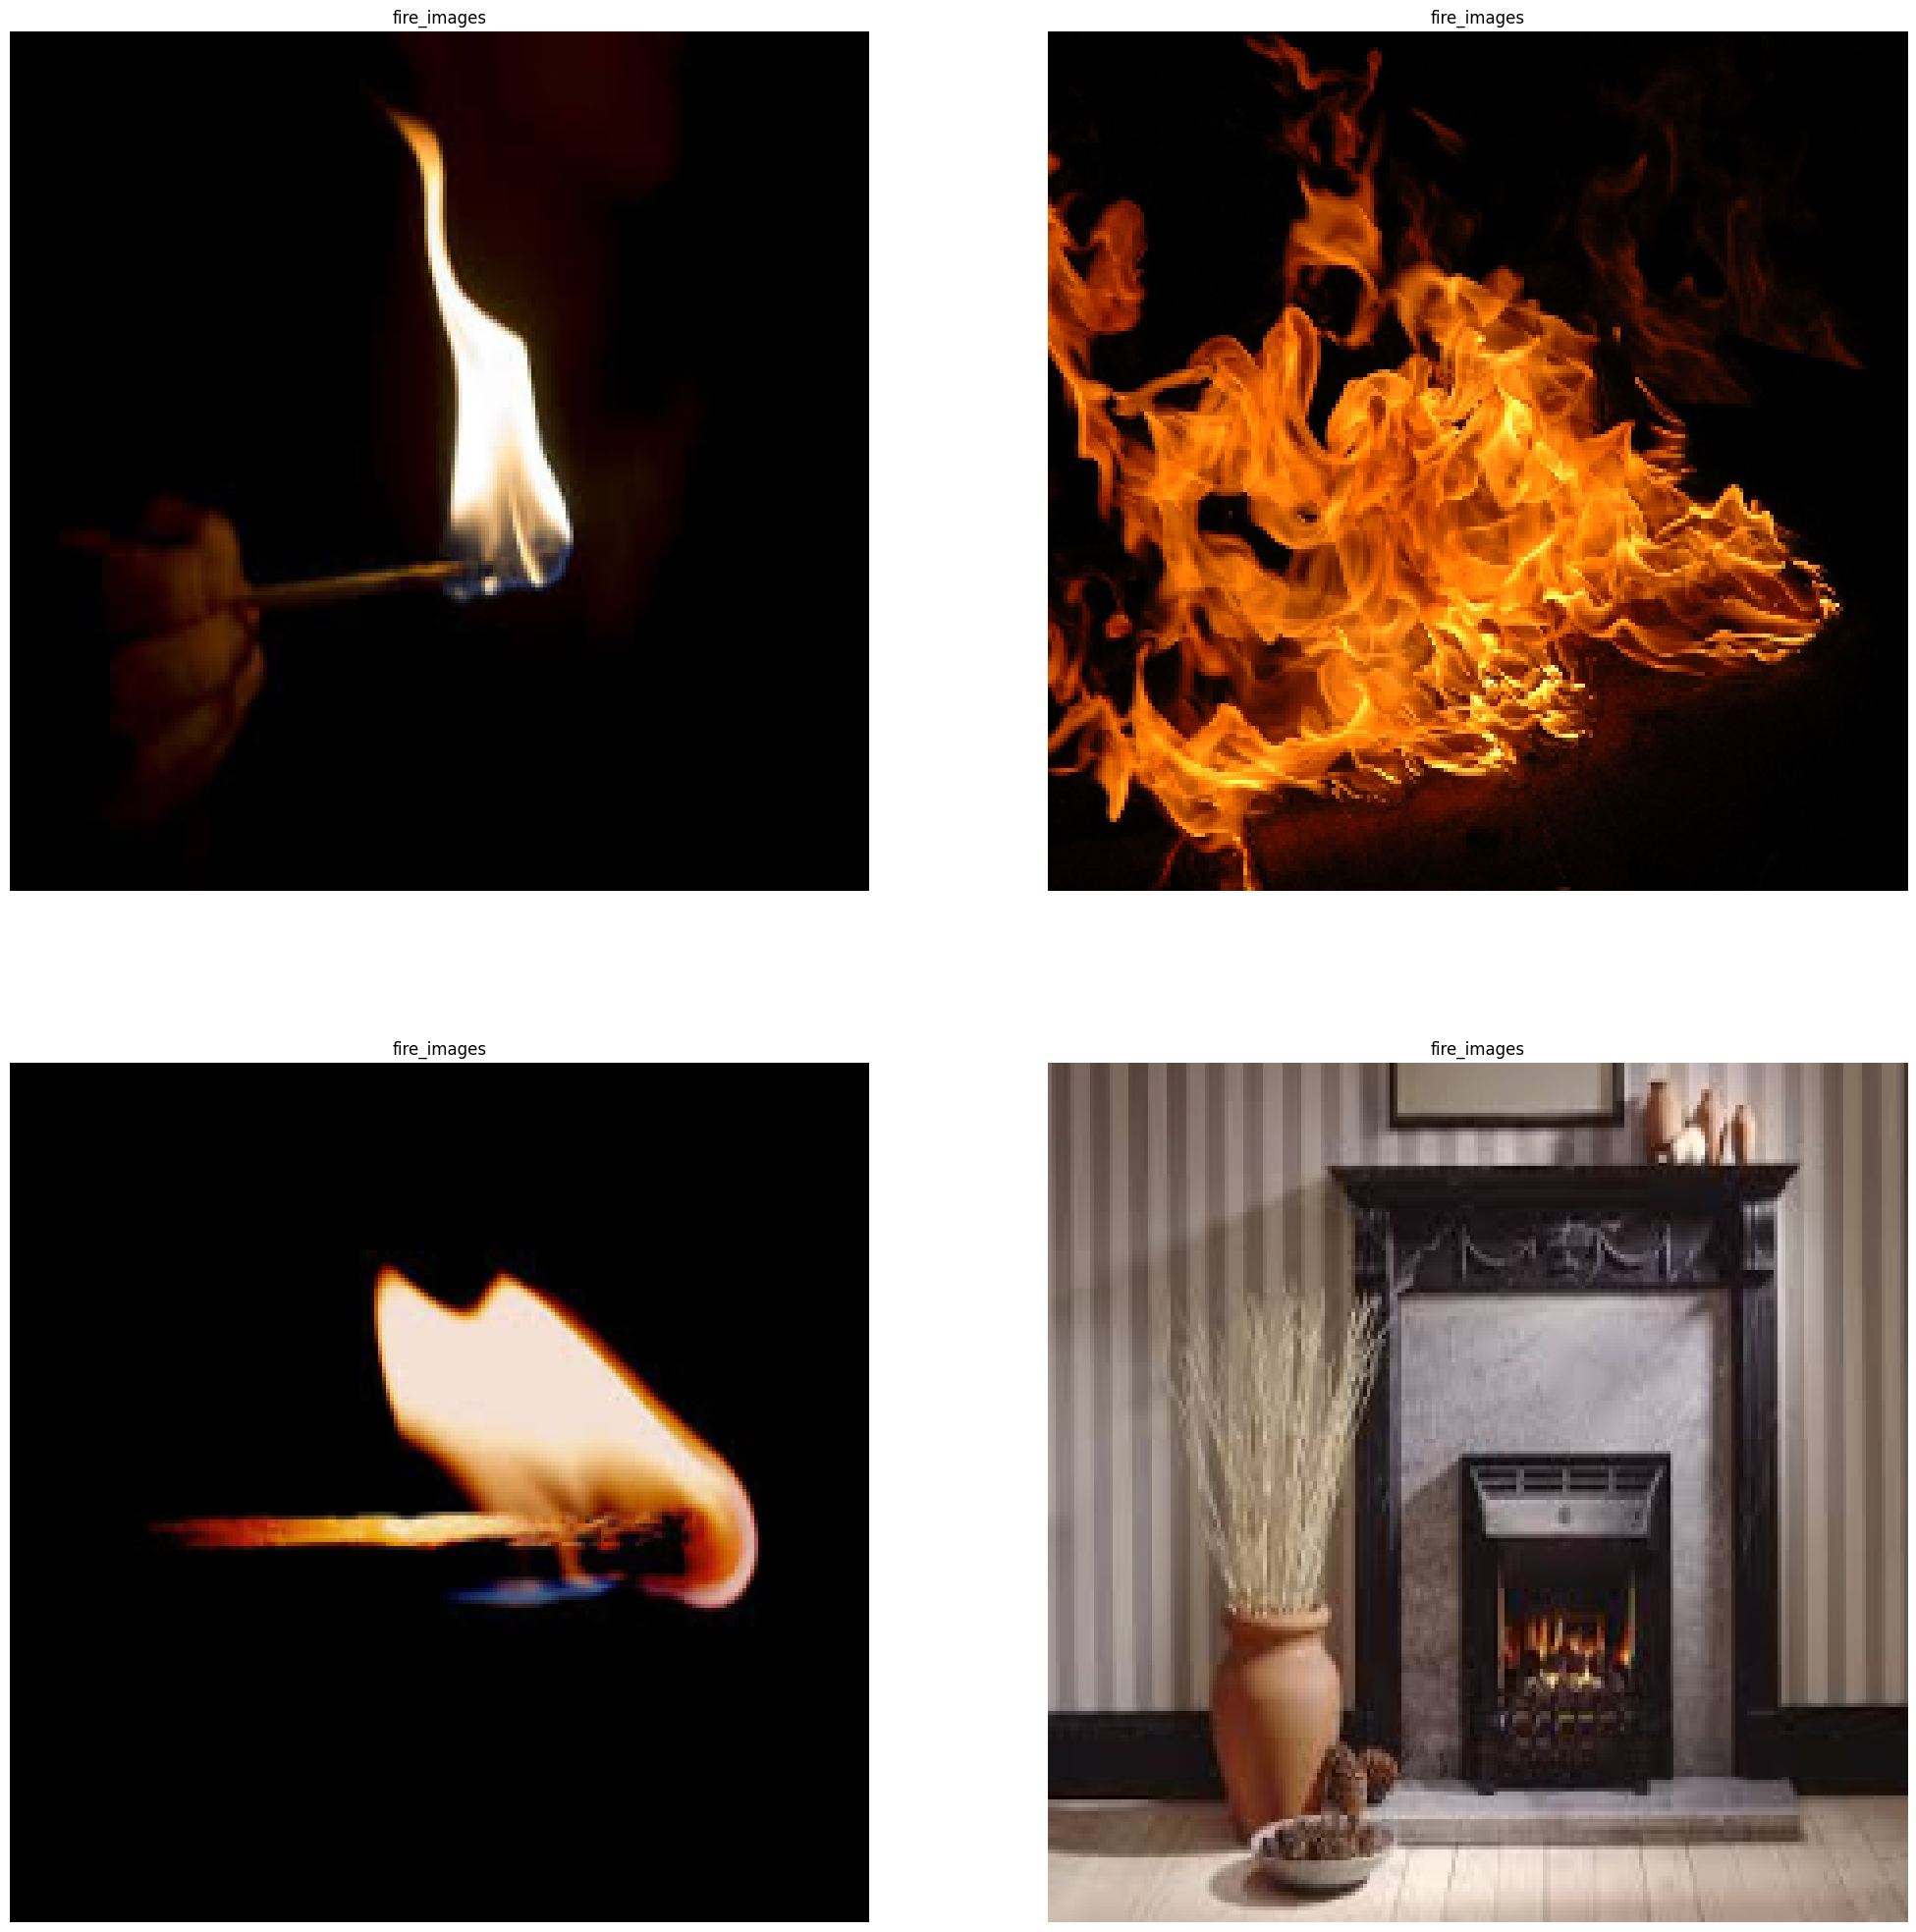

In [ ]:
# def Test(path):
#     save_model = keras.models.load_model('/kaggle/working/my_keras_model.h5')
#     images = []
#     pred = []
#     class_names = ['fire_images', 'non_fire_images']
#     for img in os.listdir(path):
#         image = cv2.imread(os.path.join(path, img))
#         image = cv2.resize(image, (224, 224))
#         image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#         images.append(image)
#         image = np.expand_dims(image, axis=0)
#         predict = save_model.predict(image)
#         pred.append(np.where(predict >= 0.5, 1, 0))
#     plt.figure(figsize=(25, 25))
#     for i in range(len(pred)):
#         plt.subplot(int(np.ceil(len(pred) / 2)), 2, i + 1)
#         plt.imshow(images[i].astype("uint8"))
#         plt.title(f'{class_names[pred[i][0][0]]}')
#         plt.axis("off")
#     plt.show()

# Test('/kaggle/input/test-iamge')